In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.duplicated().sum()

1

In [7]:
data.drop_duplicates(inplace=True)

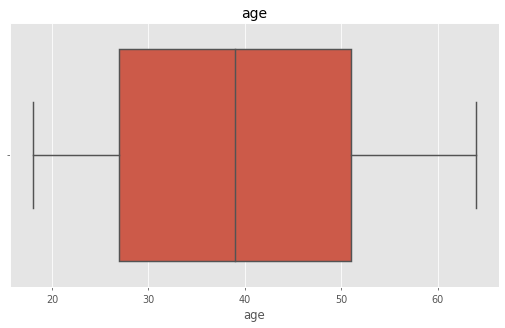

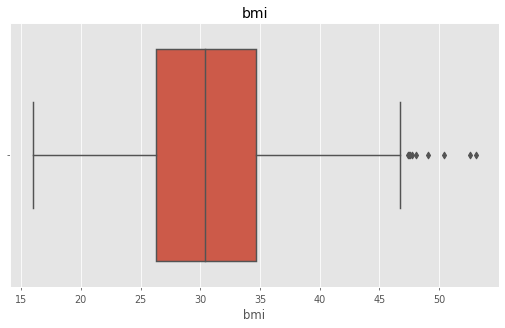

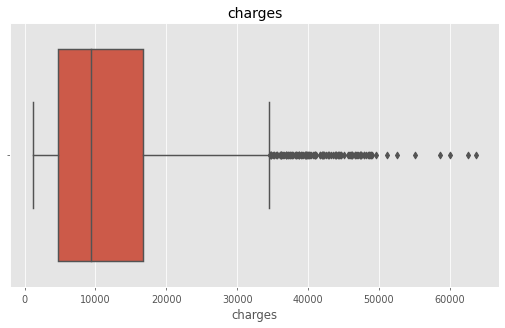

In [8]:
for i in ['age', 'bmi', 'charges']:
    
    fig = plt.figure(figsize=(9,5), dpi=70)
    ax = fig.gca()
    
    sns.boxplot(data[i], ax=ax)
    ax.set_title(i)

plt.show()

In [9]:
sex = pd.get_dummies(data['sex'])

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


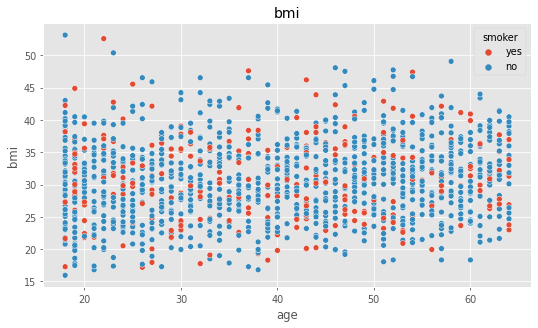

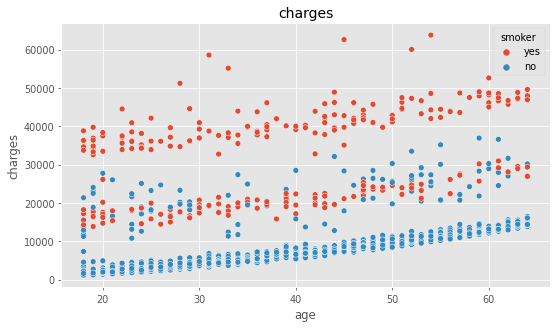

In [11]:
for i in ['bmi', 'charges']:
    
    fig = plt.figure(figsize=(9,5), dpi=70)
    ax = fig.gca()
    
    sns.scatterplot(data['age'], data[i], hue=data['smoker'])
    
    ax.set_title(i)

plt.show()

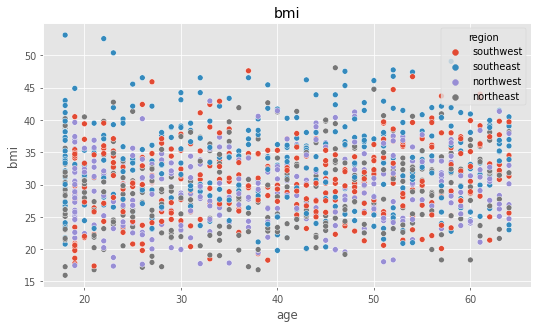

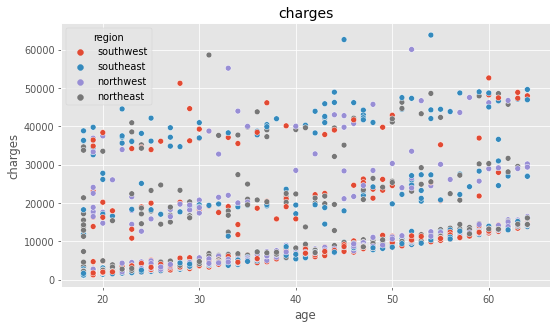

In [12]:
for i in ['bmi', 'charges']:
    
    fig = plt.figure(figsize=(9,5), dpi=70)
    ax = fig.gca()
    
    sns.scatterplot(data['age'], data[i], hue=data['region'])
    
    ax.set_title(i)

plt.show()

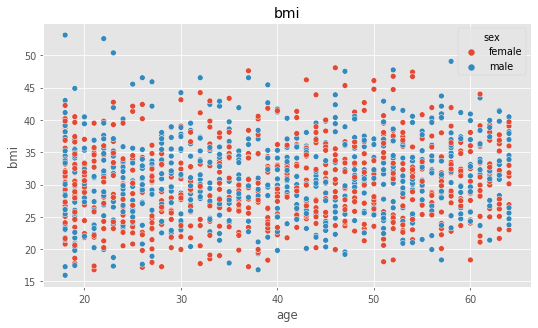

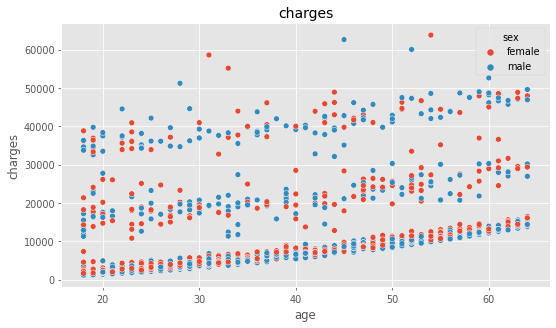

In [13]:
for i in ['bmi', 'charges']:
    
    fig = plt.figure(figsize=(9,5), dpi=70)
    ax = fig.gca()
    
    sns.scatterplot(data['age'], data[i], hue=data['sex'])
    
    ax.set_title(i)

plt.show()

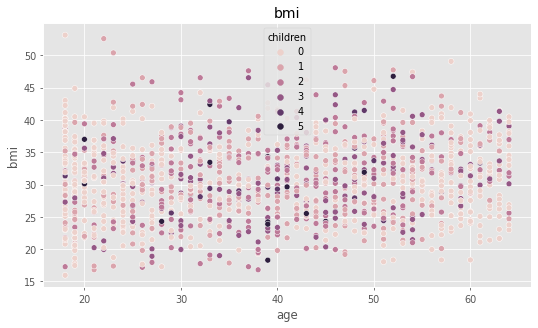

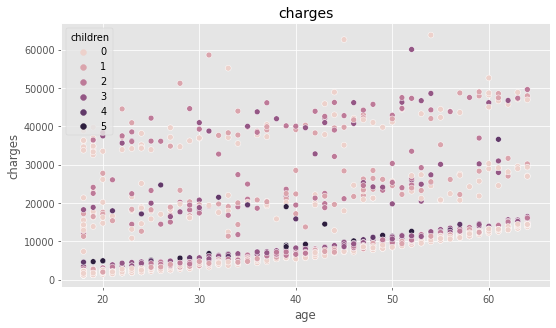

In [14]:
for i in ['bmi', 'charges']:
    
    fig = plt.figure(figsize=(9,5), dpi=70)
    ax = fig.gca()
    
    sns.scatterplot(data['age'], data[i], hue=data['children'])
    
    ax.set_title(i)

plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()

In [17]:
encoder.fit(data['region'])

encoder.classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [18]:
data['region'] = encoder.transform(data['region'])

In [19]:
data['smoker'].replace('yes', 1, inplace=True)
data['smoker'].replace('no', 0, inplace=True)

In [20]:
data.drop(['sex'], axis=1, inplace=True)

In [21]:
frame = [sex, data]

dta = pd.concat(frame, axis=1)

In [22]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   female    1337 non-null   uint8  
 1   male      1337 non-null   uint8  
 2   age       1337 non-null   int64  
 3   bmi       1337 non-null   float64
 4   children  1337 non-null   int64  
 5   smoker    1337 non-null   int64  
 6   region    1337 non-null   int32  
 7   charges   1337 non-null   float64
dtypes: float64(2), int32(1), int64(3), uint8(2)
memory usage: 70.5 KB


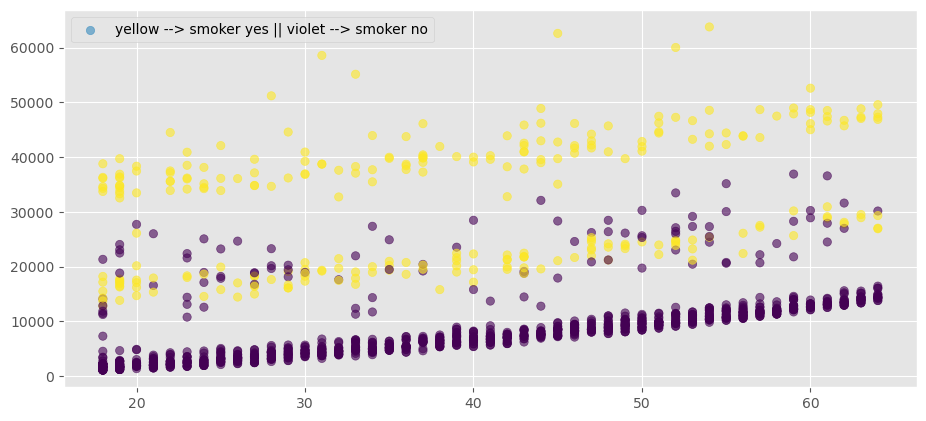

In [23]:
fig = plt.figure(figsize=(11,5), dpi=100)
ax = fig.gca()

ax.scatter(dta['age'], dta['charges'], c=(dta['smoker'] + 3)*4, alpha=0.6)
plt.legend(['yellow --> smoker yes || violet --> smoker no'])

In [24]:
from sklearn.manifold import TSNE

In [25]:
t_sne = TSNE(n_components=3)

In [26]:
X_tsne = t_sne.fit_transform(dta.iloc[:,:-1])

Text(0.5, 0.92, 'T-SNE')

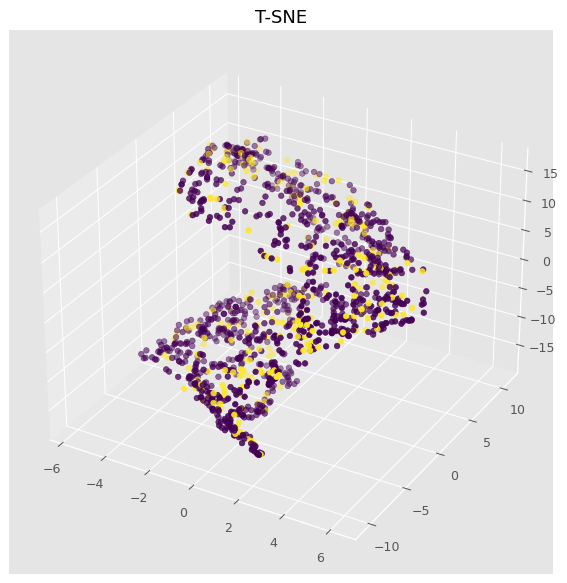

In [27]:
fig = plt.figure(figsize=(13,8), dpi=90)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_tsne[:,0], X_tsne[:,1], X_tsne[:,2], c=dta.loc[:,'smoker'])
ax.set_title('T-SNE')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

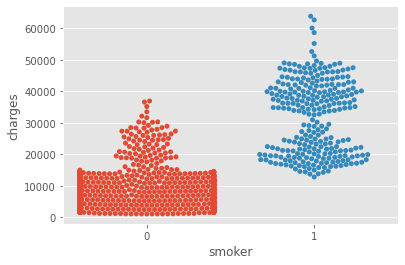

In [28]:
sns.swarmplot(data['smoker'], data['charges'])

In [30]:
import scipy as sc

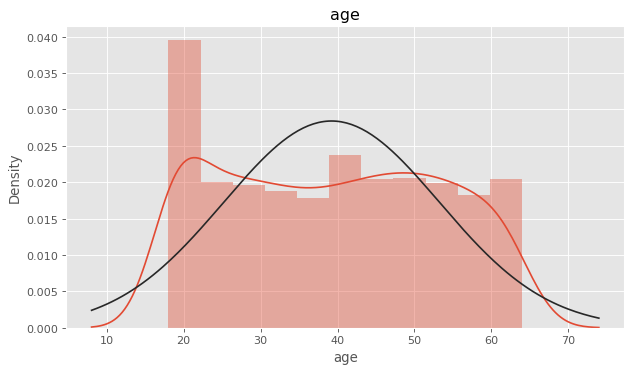

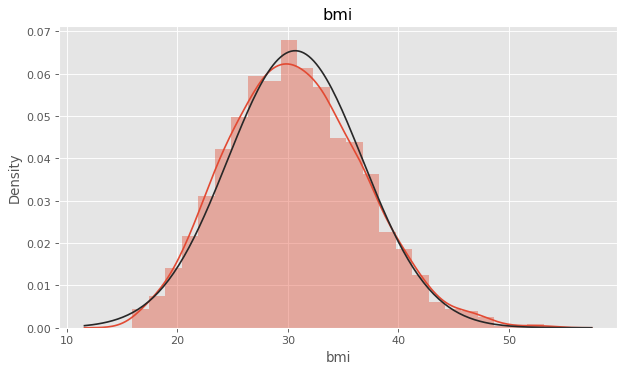

In [31]:
for i in ['age', 'bmi']:
    
    fig = plt.figure(figsize=(9,5), dpi=80)
    ax = fig.gca()
    
    sns.distplot(data[i], ax=ax, fit=sc.stats.norm)
    ax.set_title(i)
    

In [32]:
import scipy as sc

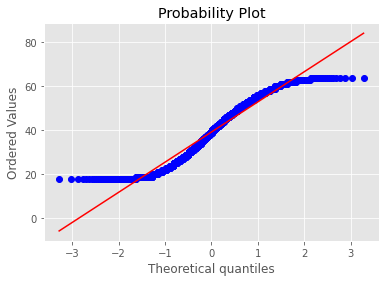

In [33]:
sc.stats.probplot(data['age'], plot=plt)
plt.show()

In [36]:
shapiro, p_value = sc.stats.shapiro(data['age'])

print(f'Shapiro: {shapiro:.3f}\tp_value: {p_value:.3f}')

Shapiro: 0.945	p_value: 0.000


In [37]:
sc.stats.skew(data['age'])

0.054719294607049676

In [38]:
dta.head()

,female,male,age,bmi,children,smoker,region,charges
0,1,0,19,27.900,0,1,3,16884.92400
1,0,1,18,33.770,1,0,2,1725.55230
2,0,1,28,33.000,3,0,2,4449.46200
3,0,1,33,22.705,0,0,1,21984.47061
4,0,1,32,28.880,0,0,1,3866.85520


In [39]:
dta['age'] =  dta['age']/np.max(dta['age'])

dta['bmi'] = dta['bmi']/np.max(dta['bmi'])

In [40]:
X, y = dta.iloc[:,:-1], dta.iloc[:,-1]

In [41]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=1)

In [44]:
X_pca = pca.fit_transform(data.loc[:,['age','bmi','smoker']])

Text(0.5, 1.0, 'One Component')

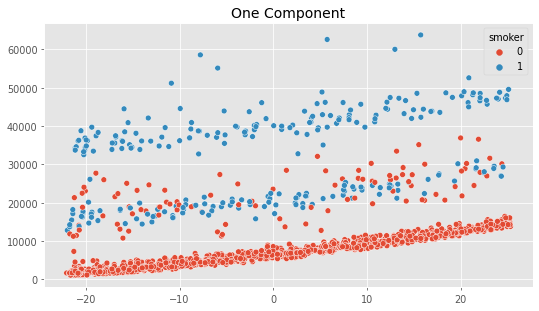

In [45]:
fig = plt.figure(figsize=(9,5), dpi=70)
ax = fig.gca()

sns.scatterplot(x=X_pca[:,0], y=y.values, hue=dta['smoker'])
ax.set_title('One Component')

In [47]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X[['age','bmi','smoker']], y, test_size=0.3)

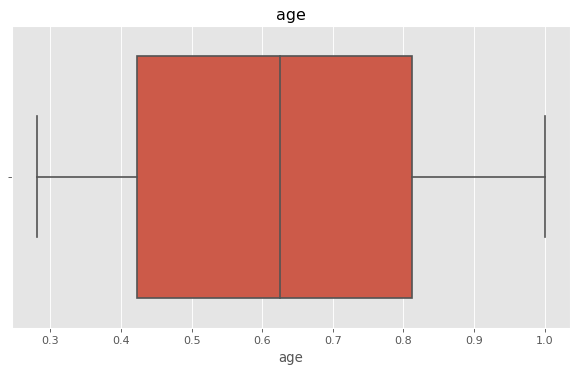

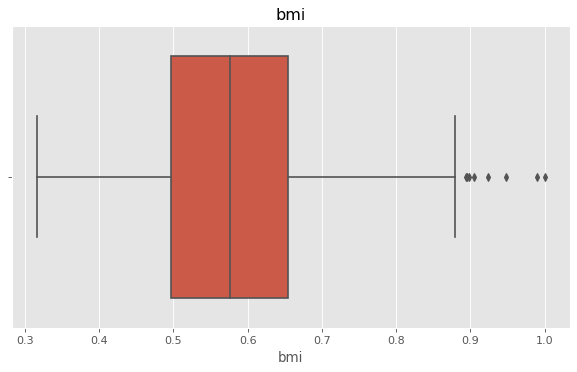

In [57]:
for i in ['age', 'bmi']:
    
    fig = plt.figure(figsize=(9,5), dpi=80)
    ax = fig.gca()
    
    sns.boxplot(X_train[i], ax=ax)
    ax.set_title(i)

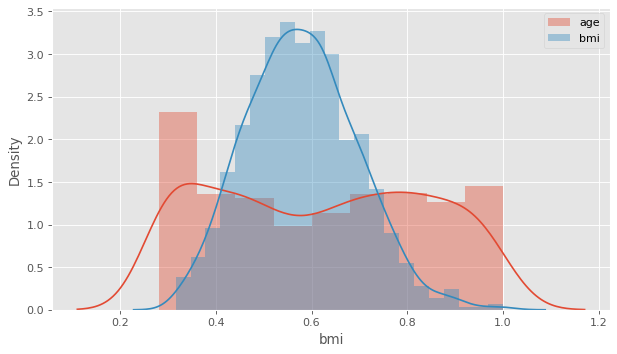

In [66]:
fig = plt.figure(figsize=(9,5), dpi=80)
ax = fig.gca()

sns.distplot(X_train['age'], label='age', ax=ax)
sns.distplot(X_train['bmi'], label='bmi', ax=ax)
plt.legend()

In [93]:
from xgboost import XGBRegressor

In [284]:
def score(model, X_, y_):
    
    mae = mean_absolute_error(y_, model.predict(X_))
    
    sco = model.score(X_, y_)
    return f'MAE: {mae:.3f}    SCORE: {sco:.3f}'

In [285]:
model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=1,
                            base_score=3842.3423423423424,
                            objective='reg:tweedie', tweedie_variance_power=1.6161616161616164)
model.fit(X_train, y_train)

score(model, X_test, y_test)

'MAE: 2307.041    SCORE: 0.873'

In [286]:
score(model, X_train, y_train)

'MAE: 2292.090    SCORE: 0.887'

In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [293]:
-1*cross_val_score(model, X_test, y_test, cv=3, scoring='neg_mean_absolute_error')

array([2881.21862995, 2446.6106236 , 2511.72797681])

In [300]:
X_test.shape

(402, 3)